### Simple Connection of a MySQL Database

In [ ]:
### import MySQLdb
### import mysql.connector

In [7]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

### Connection using pymsql module

In [1]:
import pymysql

In [2]:
conn = pymysql.Connect(host = '111.111.111.111',user = 'monica',password = 'a2i2',database = 'a2i2_monica', port = 3306, use_unicode = 'TRUE')

In [3]:
cur = conn.cursor()
# ===========================================================
# Executes query
# ===========================================================
cur.execute("SELECT * FROM a2i2_monica.produto LIMIT 30000;")
# ===========================================================
# Exhibits database structure
# ===========================================================
print(cur.description)
print()

((u'codBarra', 253, None, 13, 13, 0, False), (u'nome', 253, None, 45, 45, 0, False), (u'fabricante', 253, None, 45, 45, 0, True), (u'categoria', 3, None, 2, 2, 0, True))
()


In [ ]:
import MySQLdb

# Open database connection
db = MySQLdb.connect("localhost","testuser","test123","TESTDB" )

# prepare a cursor object using cursor() method
cursor = db.cursor()

# Prepare SQL query to INSERT a record into the database.
sql = """INSERT INTO EMPLOYEE(FIRST_NAME,
         LAST_NAME, AGE, SEX, INCOME)
         VALUES ('Mac', 'Mohan', 20, 'M', 2000)"""
try:
   # Execute the SQL command
   cursor.execute(sql)
   # Commit your changes in the database
   db.commit()
except:
   # Rollback in case there is any error
   db.rollback()

# disconnect from server
db.close()

In [ ]:
import MySQLdb

# Open database connection
db = MySQLdb.connect("localhost","testuser","test123","TESTDB" )

# prepare a cursor object using cursor() method
cursor = db.cursor()

# Prepare SQL query to INSERT a record into the database.
sql = "INSERT INTO EMPLOYEE(FIRST_NAME, \
       LAST_NAME, AGE, SEX, INCOME) \
       VALUES ('%s', '%s', '%d', '%c', '%d' )" % \
       ('Mac', 'Mohan', 20, 'M', 2000)
try:
   # Execute the SQL command
   cursor.execute(sql)
   # Commit your changes in the database
   db.commit()
except:
   # Rollback in case there is any error
   db.rollback()

# disconnect from server
db.close()

In [4]:
# get the number of rows in the result set (or the maximum specified in the SELECT statement)
num_rows= cur.rowcount
print num_rows

30000


In [5]:
# get and display one row at a time
# for row in cur: 
   # print(row)

In [ ]:
## type(row)

### Creates a Dataframe directly from a SQL query

In [8]:
sql_query = "SELECT * FROM a2i2_monica.produto LIMIT 30000;"
df_produto = pd.read_sql(sql_query, conn)

In [9]:
df_produto.head()

,codBarra,nome,fabricante,categoria
0,,PENTE LONDON BONITINHO PROFISSIONAL 1196,APAG,3
1,000011,DESATIVADO BIOFENAC LP 100MG CPS C/20,ACHE,6
2,007288,REDOXON 1G LIMAO CPR C/10,BAYER OTC,6
3,007582,CANDECLA-ENGOV ENV C/4,DIVERSOS,14
4,011215,FRAMB RAYS PAYOT 155ML,PAYOT,3


In [10]:
df_produto.tail()

,codBarra,nome,fabricante,categoria
29995,7896658001666,TANDRILAX 300+125+30mg cx 30 comp,ACHE,6
29996,7896658001680,VITA E 400mg fr 30 cap,ACHE,6
29997,7896658001727,NISULID 20mg/g gel bg 40g,ACHE,14
29998,7896658001741,NOVOCILIN 250mg/5ml po prep extemp sus oral f,ACHE,6
29999,7896658001765,ANTUX 30mg sol oral fr gts 20ml,ACHE,6


In [11]:
# Dimensions of the dataframe
df_produto.shape

(30000, 4)

In [13]:
cur.close()

### Query to create time series of sales since a given starting date (01/01/2013)

In [14]:
part1="select datavenda, categoria, idproduto, quantidade, (valorUnitario - descontoUnitario) from a2i2_monica.itemvenda"
part2= " left join a2i2_monica.venda on a2i2_monica.itemvenda.idNotaVenda = a2i2_monica.venda.idNotaVenda"
part3= " left join a2i2_monica.produto on a2i2_monica.itemvenda.idProduto = a2i2_monica.produto.codBarra"
part4 = " where dataVenda >= '2015-07-01';"

In [15]:
sql_query_historico=part1+part2+part3+ part4

In [16]:
print sql_query_historico

select datavenda, categoria, idproduto, quantidade, (valorUnitario - descontoUnitario) from a2i2_monica.itemvenda left join a2i2_monica.venda on a2i2_monica.itemvenda.idNotaVenda = a2i2_monica.venda.idNotaVenda left join a2i2_monica.produto on a2i2_monica.itemvenda.idProduto = a2i2_monica.produto.codBarra where dataVenda >= '2015-07-01';


In [17]:
%%time
df_query_historico = pd.read_sql(sql_query_historico, conn)

Wall time: 17min 43s


In [18]:
df_query_historico.rename(columns={'(valorUnitario - descontoUnitario)': 'venda_liq'}, inplace=True)

In [19]:
df_query_historico.head()

,datavenda,categoria,idproduto,quantidade,venda_liq
0,2015-07-11,3,7898422751234,1,3.03
1,2015-07-01,6,7891106006279,1,11.82
2,2015-07-01,14,7891104193087,1,5.42
3,2015-07-01,20,7898495602457,2,8.68
4,2015-07-02,6,7891106006279,1,11.94


In [20]:
df_query_historico.tail()

,datavenda,categoria,idproduto,quantidade,venda_liq
44122,2015-07-31,3,340525,1,2
44123,2015-07-31,3,340525,1,2
44124,2015-07-31,3,340525,1,2
44125,2015-07-31,3,340525,1,2
44126,2015-07-31,3,340525,1,2


### Creating a Dataframe with a column of totals and columns of quantities sold for all categories

In [21]:
df_total_sales=pd.pivot_table(df_query_historico,index=["datavenda"], 
                   columns=["categoria"], values = ["venda_liq"], aggfunc=[np.sum,len],fill_value=0,margins=True)

#### Subsetting The Dataframe to make sure indexes are correct

In [22]:
df_total_sales.ix[0:5,0:10]

sum                                                   \
           venda_liq                                                    
categoria         1       2        3       4      5        6       7    
datavenda                                                               
2015-07-01    188.32  187.71   900.25  428.58  18.19  5023.35  171.78   
2015-07-02    232.14  225.50  1010.09  374.28  50.87  5092.63  204.22   
2015-07-03    195.22  298.60  1060.00  393.77  38.44  4703.60  115.10   
2015-07-04    207.90  189.66   760.46  341.80  80.66  3889.70  215.79   
2015-07-05    171.88  172.91   517.00  193.75   5.64  2141.88   88.67   

                                     
                                     
categoria        8       9       10  
datavenda                            
2015-07-01  2463.85  273.57  214.91  
2015-07-02  2819.37  283.70  173.80  
2015-07-03  2187.87  254.79  193.36  
2015-07-04  2656.00  147.69  170.09  
2015-07-05  1405.92  146.76  129.21

In [23]:
df_total_sales.ix[0:5,21:48]

sum                 len                                  \
           venda_liq           venda_liq                                   
categoria       22.0       All       1.0 2.0  3.0  4.0 5.0  6.0 7.0  8.0   
datavenda                                                                  
2015-07-01    217.93  16937.60        37  27  152  157   3  229  21  176   
2015-07-02    310.10  17328.82        45  32  159  142   8  220  22  225   
2015-07-03    464.43  16543.05        46  31  158  141   5  209  24  189   
2015-07-04    428.22  15221.33        41  24  127  113   6  178  24  200   
2015-07-05    152.06   8561.77        28  15   87   64   2   90  12   89   

            ...                                                      
            ...                                                      
categoria   ...  14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0   All  
datavenda   ...                                                      
2015-07-01  ...   372   27   20   29   29    0  187    0   17  1659  
2015-07-02  ...   391   40   30   15   33    1  163    1   26  1706  
2015-07-03  ...   414   34   31   32   37    1  167    0   35  1700  
2015-07-04  ...   369   25   11   29   15    2  174    0   36  1517  
2015-07-05  ...   201   10    4   21   21    0   73    0   13   828  

[5 rows x 25 columns]

In [24]:
df_total_sales.columns

MultiIndex(levels=[[u'sum', u'len'], [u'venda_liq'], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, u'All']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]],
           names=[None, None, u'categoria'])

In [25]:
# Acessing the column of total sales via index
df_total_sales.ix[0:10,22]

datavenda
2015-07-01    16937.60
2015-07-02    17328.82
2015-07-03    16543.05
2015-07-04    15221.33
2015-07-05     8561.77
2015-07-06    17473.72
2015-07-07    15563.92
2015-07-08    14001.50
2015-07-09    16360.03
2015-07-10    18072.12
Name: (sum, venda_liq, All), dtype: float64

In [26]:
# Acessing the column of total sales via name
df_total_sales["sum", "venda_liq","All"][0:10]

datavenda
2015-07-01    16937.60
2015-07-02    17328.82
2015-07-03    16543.05
2015-07-04    15221.33
2015-07-05     8561.77
2015-07-06    17473.72
2015-07-07    15563.92
2015-07-08    14001.50
2015-07-09    16360.03
2015-07-10    18072.12
Name: (sum, venda_liq, All), dtype: float64

In [27]:
# Number of observations of sales data 
num_rows=len(df_total_sales.index)

In [28]:
# Create time index
t=df_total_sales.index.values

In [29]:
type(t)

numpy.ndarray

In [30]:
t[0:10]

array([datetime.date(2015, 7, 1), datetime.date(2015, 7, 2),
       datetime.date(2015, 7, 3), datetime.date(2015, 7, 4),
       datetime.date(2015, 7, 5), datetime.date(2015, 7, 6),
       datetime.date(2015, 7, 7), datetime.date(2015, 7, 8),
       datetime.date(2015, 7, 9), datetime.date(2015, 7, 10)], dtype=object)

In [47]:
t.shape

(32L,)

In [48]:
type(t)

numpy.ndarray

In [33]:
df_total_sales["sum", "venda_liq","All"][0:3]

datavenda
2015-07-01    16937.60
2015-07-02    17328.82
2015-07-03    16543.05
Name: (sum, venda_liq, All), dtype: float64

In [34]:
# Dimensions of the total sales dataframe
df_total_sales.shape

(32, 46)

In [37]:
start = pd.to_datetime(str(t[0]))
print start

2015-07-01 00:00:00


In [57]:
num_rows

32

In [71]:
print t

[datetime.date(2015, 7, 1) datetime.date(2015, 7, 2)
 datetime.date(2015, 7, 3) datetime.date(2015, 7, 4)
 datetime.date(2015, 7, 5) datetime.date(2015, 7, 6)
 datetime.date(2015, 7, 7) datetime.date(2015, 7, 8)
 datetime.date(2015, 7, 9) datetime.date(2015, 7, 10)
 datetime.date(2015, 7, 11) datetime.date(2015, 7, 12)
 datetime.date(2015, 7, 13) datetime.date(2015, 7, 14)
 datetime.date(2015, 7, 15) datetime.date(2015, 7, 16)
 datetime.date(2015, 7, 17) datetime.date(2015, 7, 18)
 datetime.date(2015, 7, 19) datetime.date(2015, 7, 20)
 datetime.date(2015, 7, 21) datetime.date(2015, 7, 22)
 datetime.date(2015, 7, 23) datetime.date(2015, 7, 24)
 datetime.date(2015, 7, 25) datetime.date(2015, 7, 26)
 datetime.date(2015, 7, 27) datetime.date(2015, 7, 28)
 datetime.date(2015, 7, 29) datetime.date(2015, 7, 30)
 datetime.date(2015, 7, 31) 'All']


In [136]:
dt_reference = [ts for ts in pd.to_timedelta(range(len(t)-1), unit='d') + pd.to_datetime(start)]

In [137]:
print dt_reference

[Timestamp('2015-07-01 00:00:00'), Timestamp('2015-07-02 00:00:00'), Timestamp('2015-07-03 00:00:00'), Timestamp('2015-07-04 00:00:00'), Timestamp('2015-07-05 00:00:00'), Timestamp('2015-07-06 00:00:00'), Timestamp('2015-07-07 00:00:00'), Timestamp('2015-07-08 00:00:00'), Timestamp('2015-07-09 00:00:00'), Timestamp('2015-07-10 00:00:00'), Timestamp('2015-07-11 00:00:00'), Timestamp('2015-07-12 00:00:00'), Timestamp('2015-07-13 00:00:00'), Timestamp('2015-07-14 00:00:00'), Timestamp('2015-07-15 00:00:00'), Timestamp('2015-07-16 00:00:00'), Timestamp('2015-07-17 00:00:00'), Timestamp('2015-07-18 00:00:00'), Timestamp('2015-07-19 00:00:00'), Timestamp('2015-07-20 00:00:00'), Timestamp('2015-07-21 00:00:00'), Timestamp('2015-07-22 00:00:00'), Timestamp('2015-07-23 00:00:00'), Timestamp('2015-07-24 00:00:00'), Timestamp('2015-07-25 00:00:00'), Timestamp('2015-07-26 00:00:00'), Timestamp('2015-07-27 00:00:00'), Timestamp('2015-07-28 00:00:00'), Timestamp('2015-07-29 00:00:00'), Timestamp('20

In [138]:
venda_total = df_total_sales["sum", "venda_liq","All"]

In [139]:
print venda_total

datavenda
2015-07-01     16937.60
2015-07-02     17328.82
2015-07-03     16543.05
2015-07-04     15221.33
2015-07-05      8561.77
2015-07-06     17473.72
2015-07-07     15563.92
2015-07-08     14001.50
2015-07-09     16360.03
2015-07-10     18072.12
2015-07-11     14946.13
2015-07-12      8816.72
2015-07-13     16720.79
2015-07-14     15017.15
2015-07-15     16558.45
2015-07-16     17267.12
2015-07-17     16547.02
2015-07-18     15575.19
2015-07-19      8048.71
2015-07-20     14192.70
2015-07-21     15419.64
2015-07-22     15221.32
2015-07-23     13119.28
2015-07-24     16337.37
2015-07-25     13015.35
2015-07-26      8721.18
2015-07-27     15092.36
2015-07-28     14212.57
2015-07-29     14540.96
2015-07-30     13344.13
2015-07-31     14273.74
All           453051.74
Name: (sum, venda_liq, All), dtype: float64


In [140]:
len(venda_total)

32

In [146]:
df_total_sales_plot=pd.DataFrame({'dt_reference': dt_reference[0:len(venda_total)-2], 'Venda Liq': venda_total[0:len(venda_total)-2]})

In [147]:
df_total_sales_plot.head()

,Venda Liq,dt_reference
datavenda,,
2015-07-01,16937.60,2015-07-01
2015-07-02,17328.82,2015-07-02
2015-07-03,16543.05,2015-07-03
2015-07-04,15221.33,2015-07-04
2015-07-05,8561.77,2015-07-05


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 14: ordinal not in range(128)

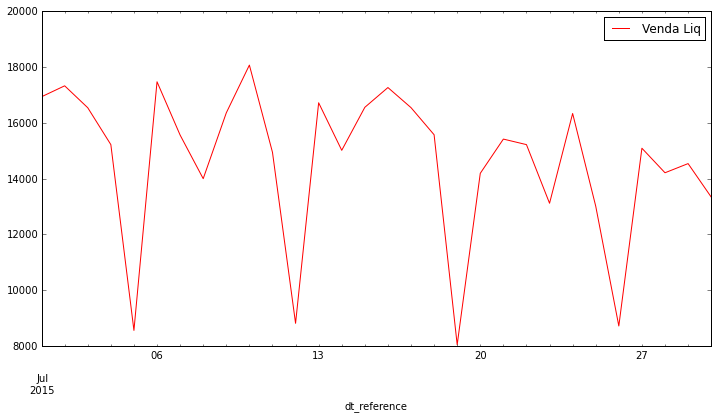

In [148]:
df_total_sales_plot.plot(figsize=(12,6), title = 'Venda Total Diária', x='dt_reference', color = "red");
#pd.DataFrame({'data': [ts for ts in pd.to_timedelta(range(len(df_total_sales)),unit='d') + pd.to_datetime(t[0])], 'Vendas)':df_total_sales["sum", "venda_liq","All"] })

In [ ]:
import matplotlib.pyplot as plt
>>> plt.style.use('ggplot')
To list all available styles, use:

>>> print plt.style.available

In [ ]:


%%time
df_model = get_model(pointids, omp.coef_, df_tags)
y = get_production(start, end, first_date, df_pivot)
yhat = omp.predict(X)


dfmse = pd.DataFrame({'RMSE':mse}, index=[8,16,32,64,128])
dfmse.plot(figsize=(12,6), style='+-')

dfProduction_t=pd.DataFrame({'dt_reference': dt_reference_t, 'Oil Production (y_t)': y_t})
dfProduction_t.plot(figsize=(17,6), title = 'Production at test period', x='dt_reference', color = "red");

In [ ]:
conn.close()